# Advanced EDA

Now that we have completed the preprocessing of the data, we can analyze the relationships between the numeric variables and our target variable, which in this case is ratings. Additionally, we can examine the relationships among the dependent variables. This exploration helps us gain a deeper understanding of the data before proceeding to modeling.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/PostBooksEDA.csv', index_col=0)
df_encoded = pd.read_csv('../data/PostEncodedBooksEDA.csv', index_col=0)

## Correlations

One of the key aspects that provide valuable insights, especially for logistic models, is examining correlations. Therefore, we will analyze our encoded dataframe to identify which variables might interfere with one another.

In [3]:
X = df_encoded.drop('rating', axis=1)
y = df_encoded['rating'].copy()

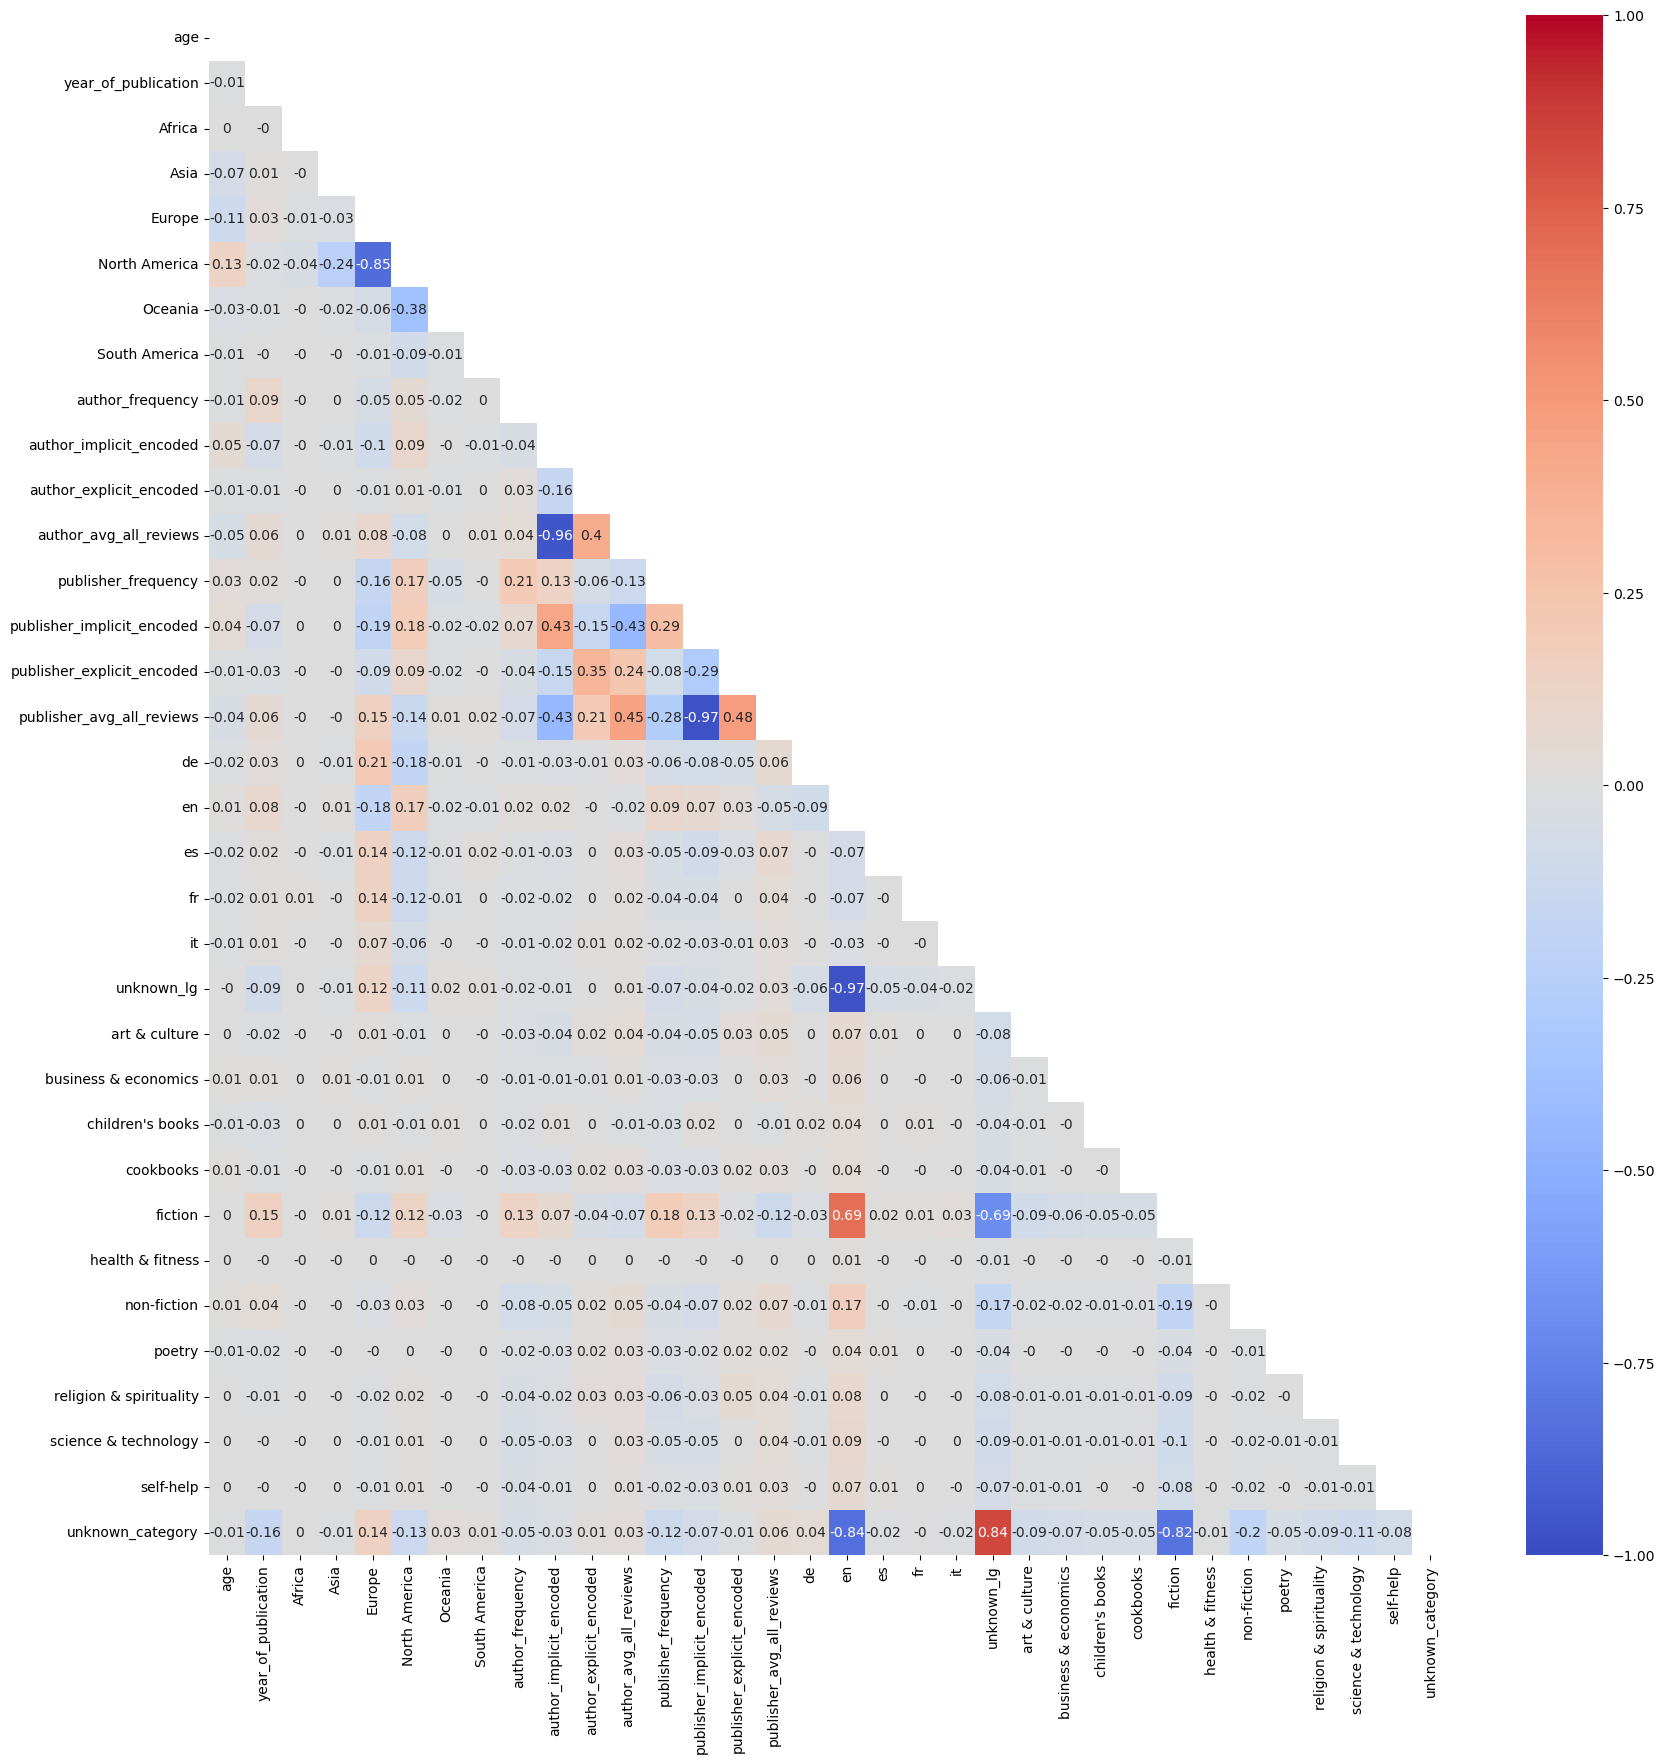

In [4]:
# Calculate all the correlations between each independent variable
corr_df = X.corr()

# Mask for upper triangular
mask = np.triu(corr_df)

# Visualize 
plt.figure(figsize=(20, 20))
sns.heatmap(corr_df.round(2), annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm', mask=mask)
plt.show()

We observe similar correlations between the columns encoded using frequency and mean encoding. This is expected, as the primary goal was to provide as much contextual value as possible to these columns. However, given the high correlations, it might be practical to drop one of these columns before modeling.

We also observe a high correlation between the unkown values in the language and book category columns. This occurs because most of the values in the dataset are unknown. Dropping the unkown columns could help models uncover better relationships among the less common variables.

North America, being the leading category among continents, shows some correlation with other continent values. Dropping one of these continents could improve the model's performance.

Summary: For Logistic models, drop Europe, Unkown_lg and Unkown_Category, and avg of all reviews.

## Relationship between the data

### Distribution of the numerical data

In [5]:
X.columns

Index(['age', 'year_of_publication', 'Africa', 'Asia', 'Europe',
       'North America', 'Oceania', 'South America', 'author_frequency',
       'author_implicit_encoded', 'author_explicit_encoded',
       'author_avg_all_reviews', 'publisher_frequency',
       'publisher_implicit_encoded', 'publisher_explicit_encoded',
       'publisher_avg_all_reviews', 'de', 'en', 'es', 'fr', 'it', 'unknown_lg',
       'art & culture', 'business & economics', 'children's books',
       'cookbooks', 'fiction', 'health & fitness', 'non-fiction', 'poetry',
       'religion & spirituality', 'science & technology', 'self-help',
       'unknown_category'],
      dtype='object')

In [6]:
X_numerical = X[['age', 'year_of_publication', 'author_frequency', 'author_implicit_encoded',
 'author_explicit_encoded', 'author_avg_all_reviews', 'publisher_frequency',
 'publisher_implicit_encoded', 'publisher_explicit_encoded', 'publisher_avg_all_reviews']]

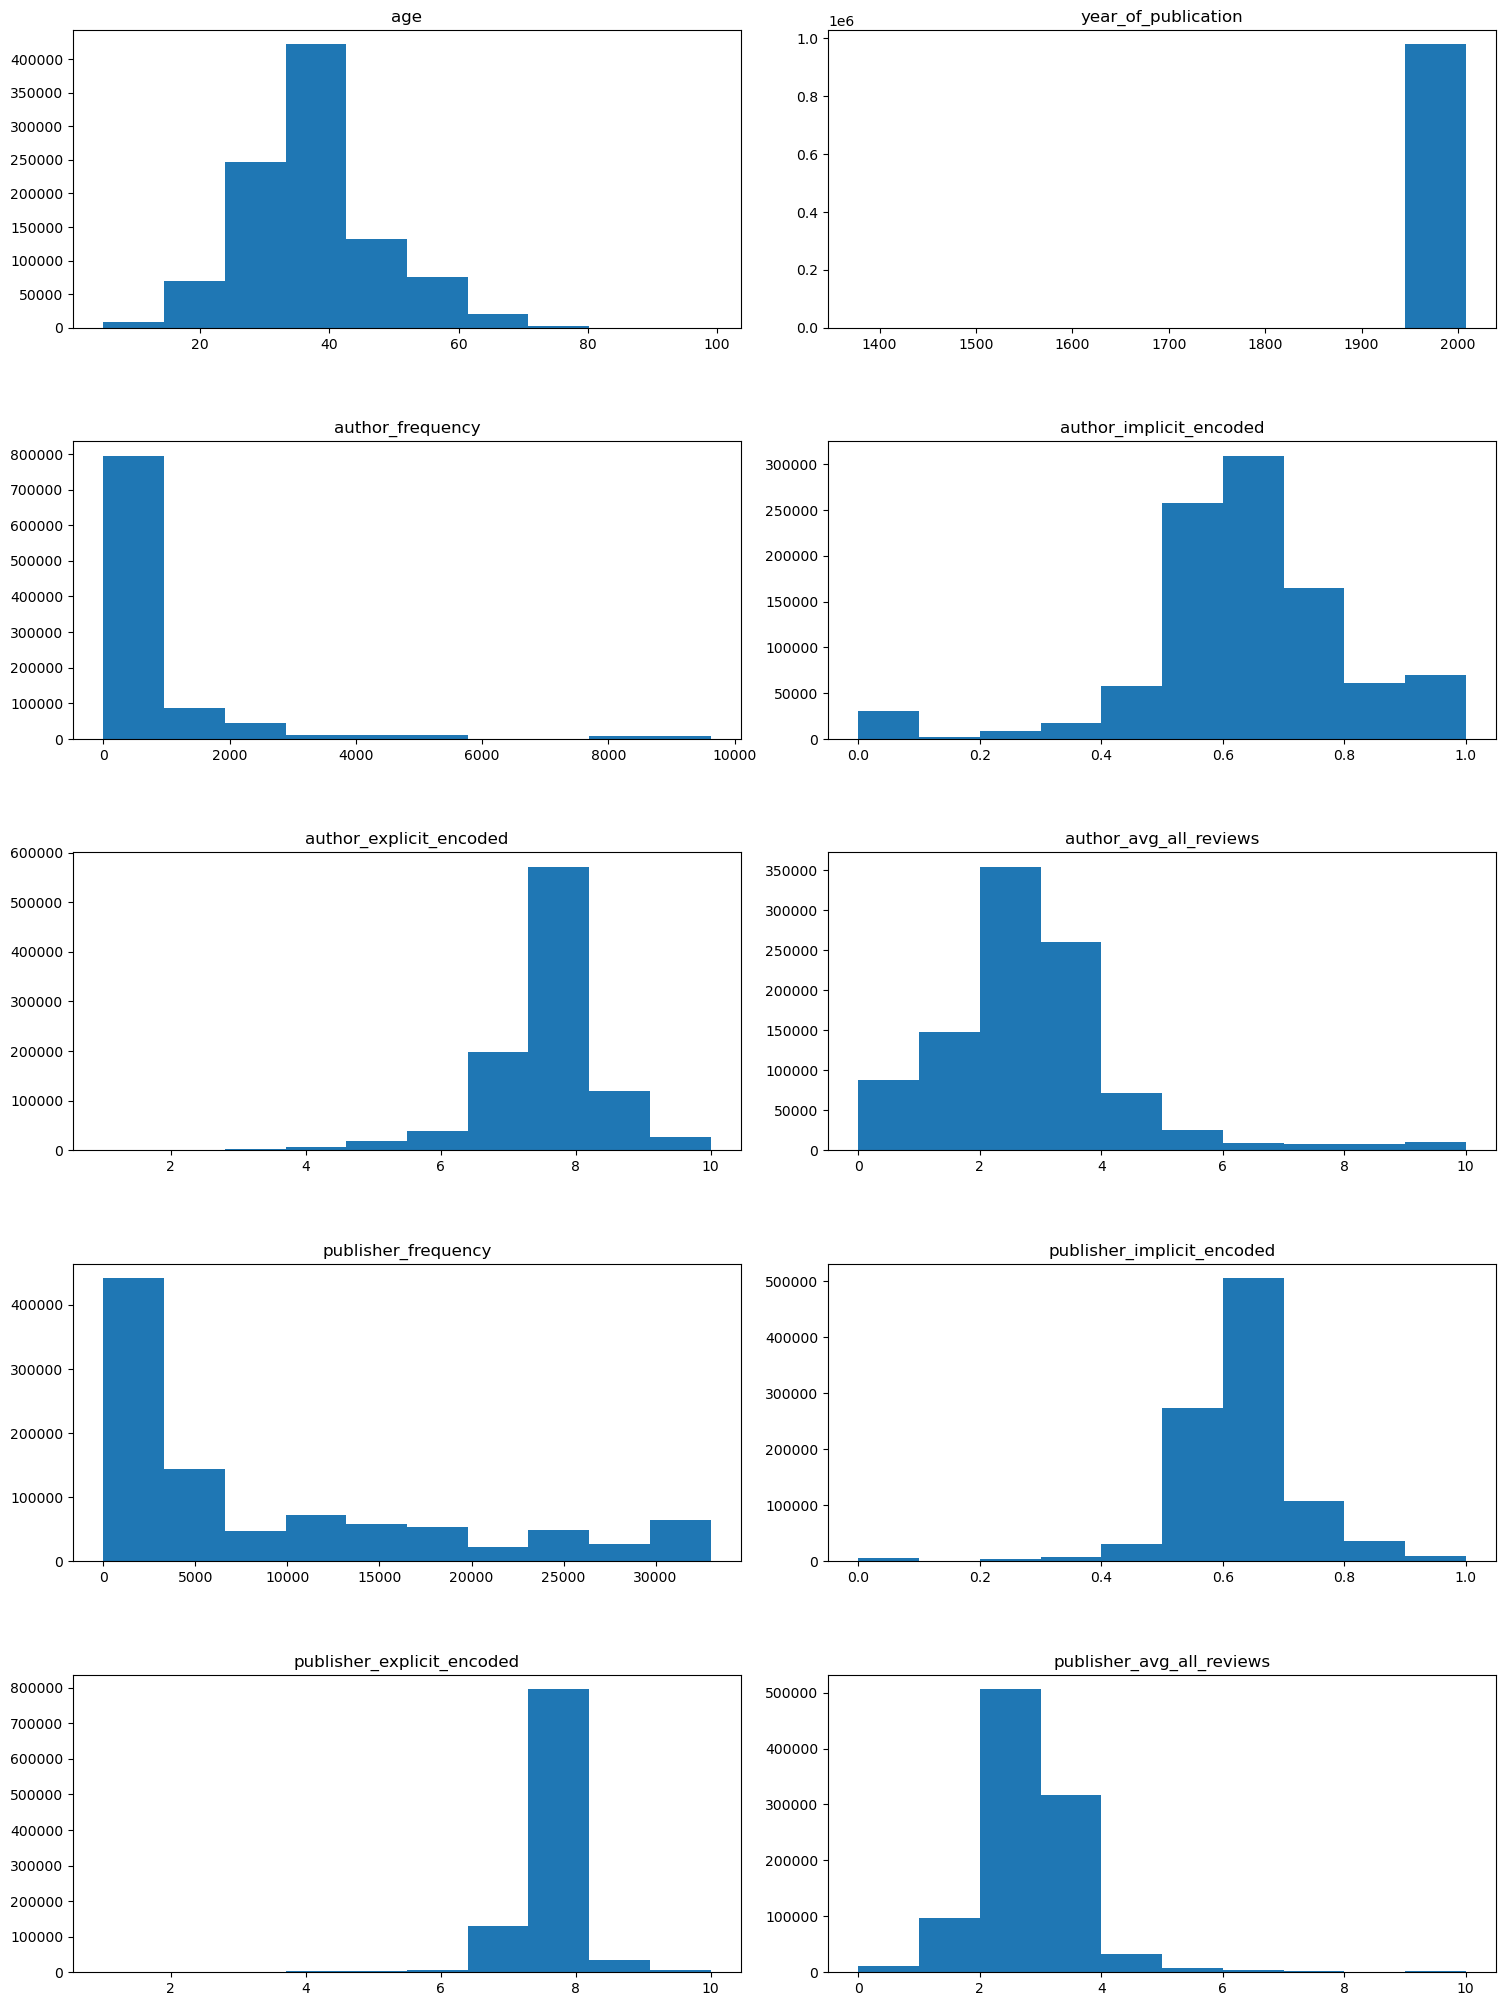

In [7]:
plt.subplots(5, 2, figsize=(15, 20))

# Plotting
for i, column in enumerate(X_numerical.columns, 1):
    plt.subplot(5,2, i)
    plt.hist(X_numerical[column])
    plt.title(column)
    
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5.0)

The majority of readers fall between the ages of 20 and 50, with a peak in the 30–40 range, while book publications are heavily concentrated post-1900, particularly around the year 2000.

Both author and publisher frequencies exhibit strong right skewness, indicating that a small number of contributors dominate the dataset, whereas the majority have limited representation

Encoded variables for authors and publishers, both implicit and explicit, are centered but lean towards higher values, suggesting consistent scoring patterns. Interestingly, the average reviews per author and publisher remain low, with most clustered below two.

These trends point to a dataset dominated by modern publications and a mix of high-frequency contributors and less-recognized entities

## Categorical data

In [8]:
X_categorical = X.drop(columns=['age', 'year_of_publication', 'author_frequency', 'author_implicit_encoded',
 'author_explicit_encoded', 'author_avg_all_reviews', 'publisher_frequency',
 'publisher_implicit_encoded', 'publisher_explicit_encoded', 'publisher_avg_all_reviews'], axis=1)

In [9]:
X_categorical

,Africa,Asia,Europe,North America,Oceania,South America,de,en,es,fr,...,children's books,cookbooks,fiction,health & fitness,non-fiction,poetry,religion & spirituality,science & technology,self-help,unknown_category
0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031170,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1031171,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1031172,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1031173,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


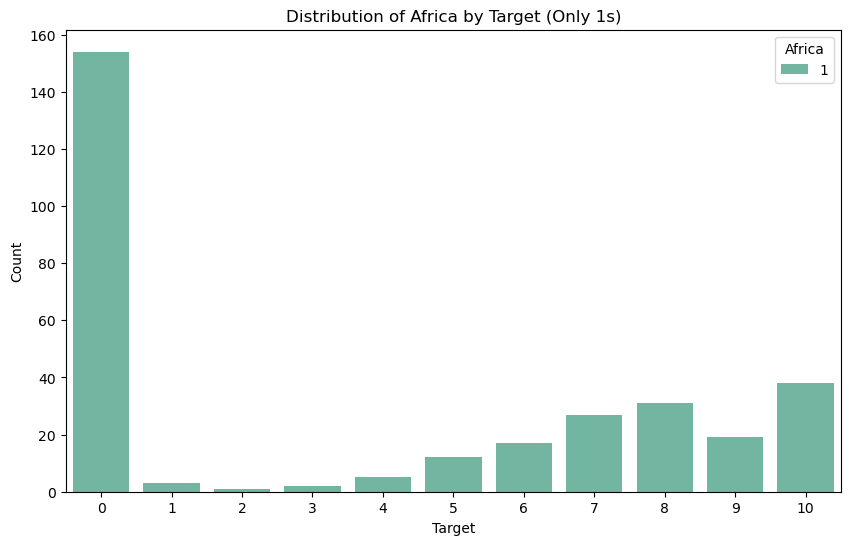

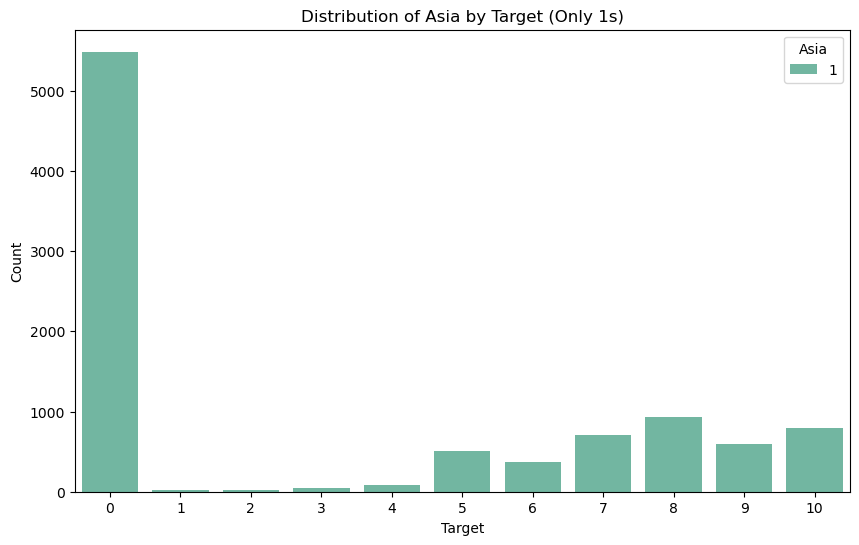

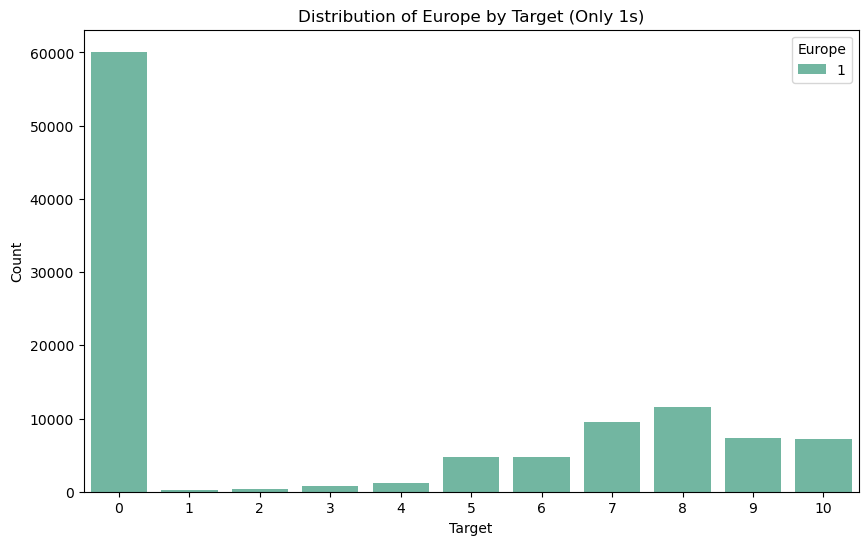

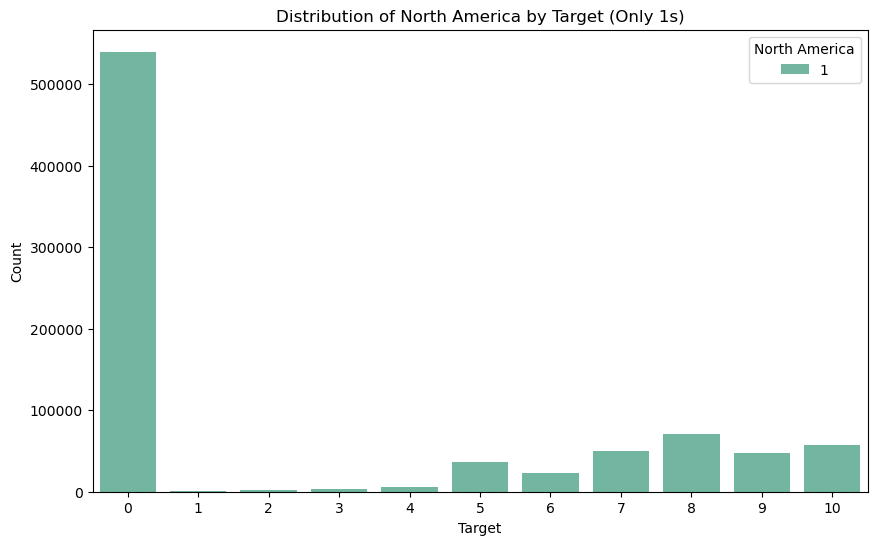

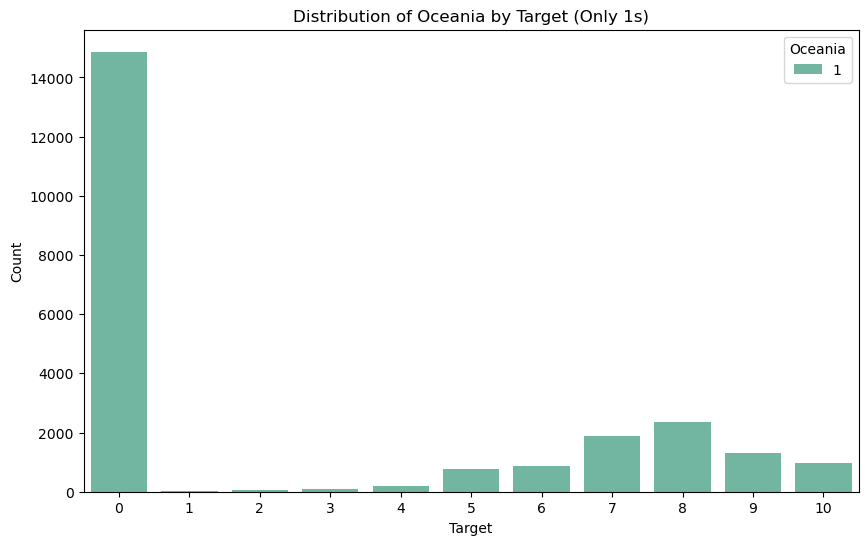

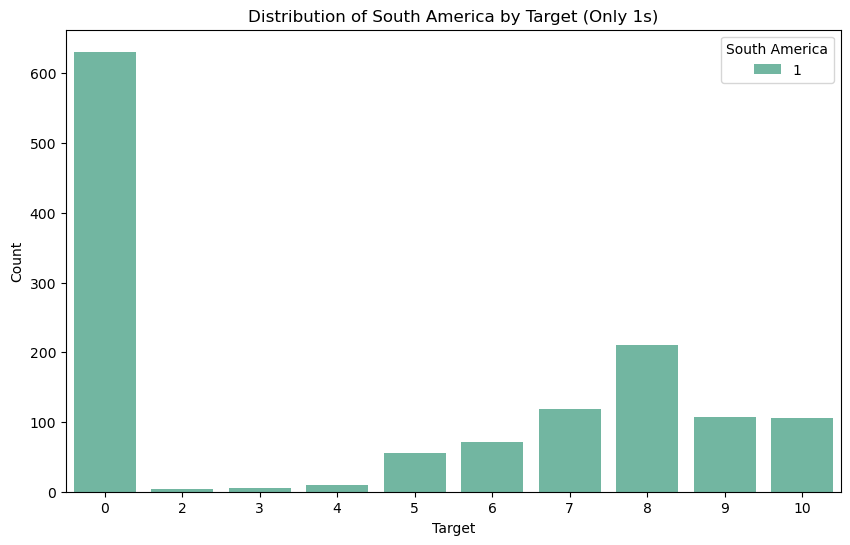

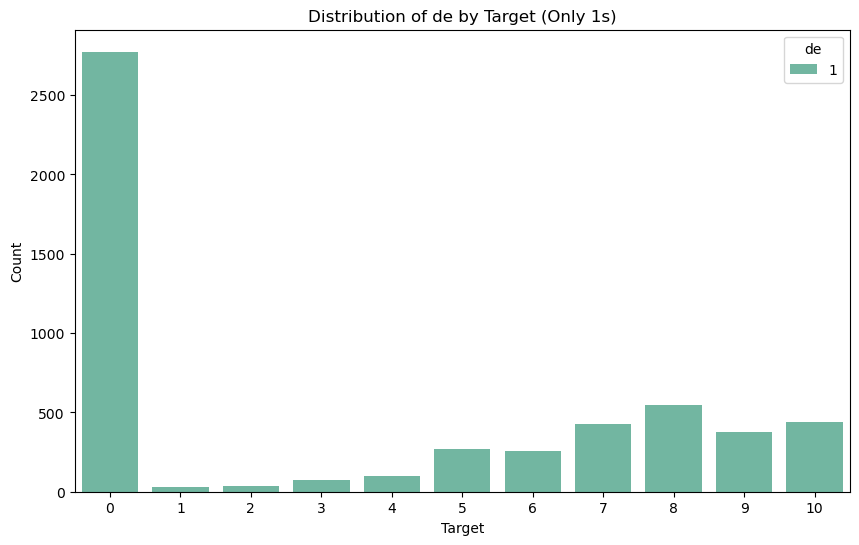

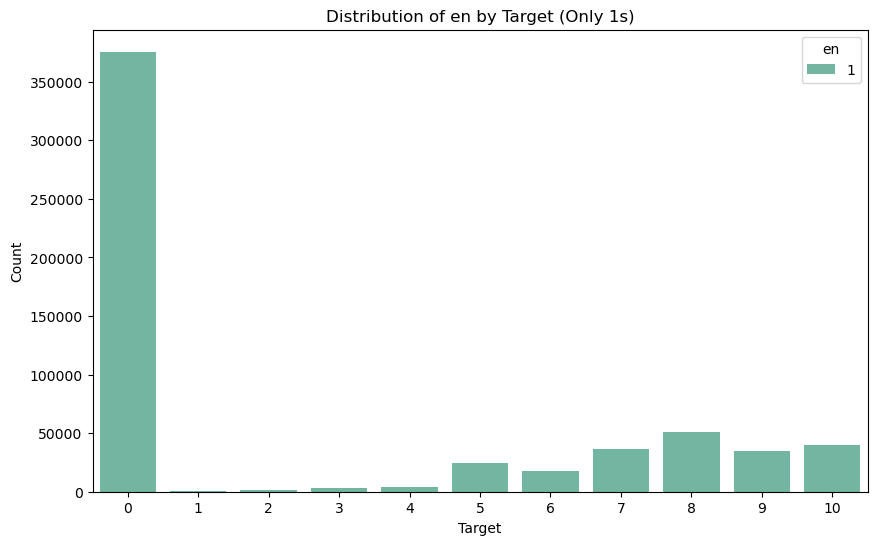

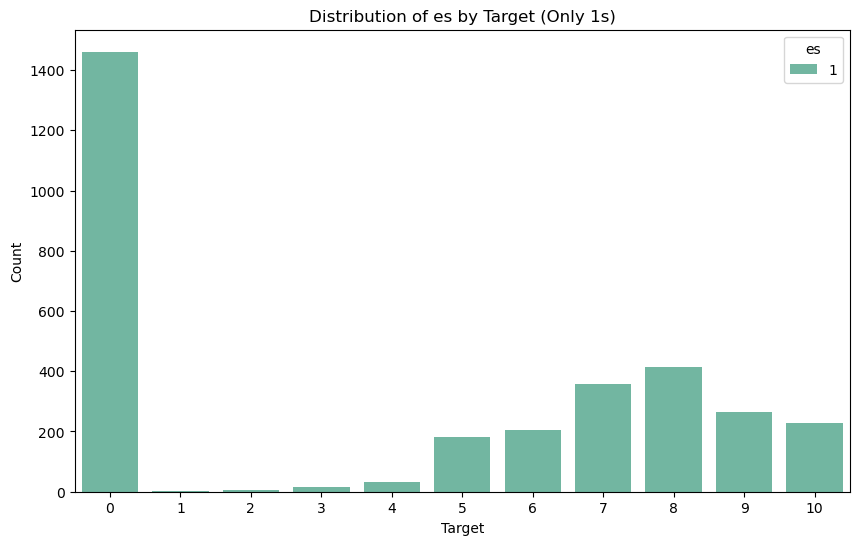

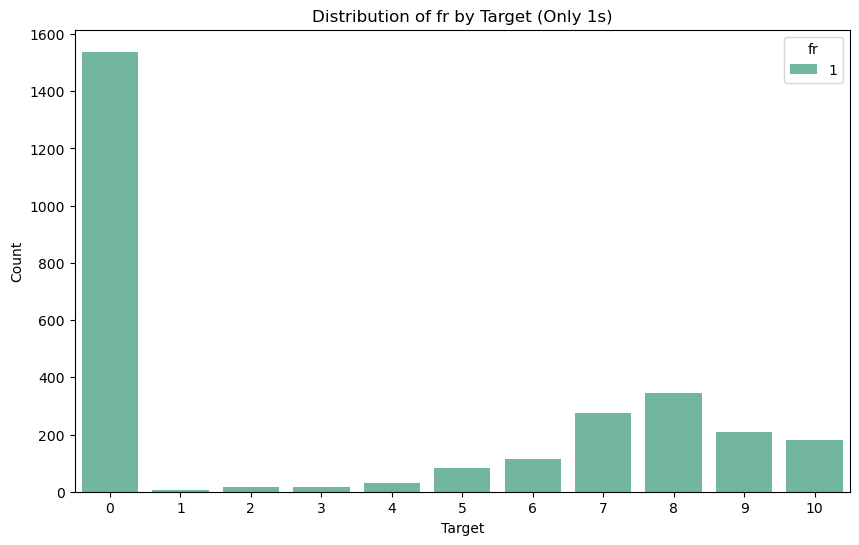

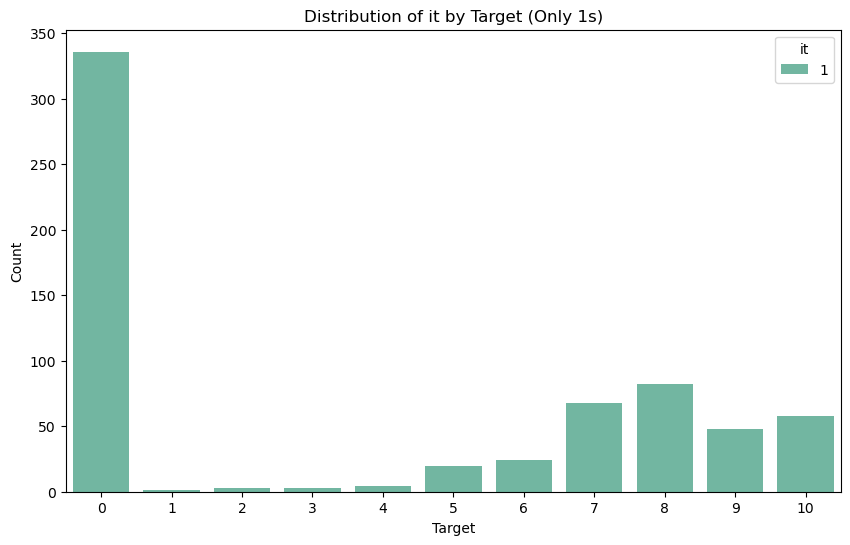

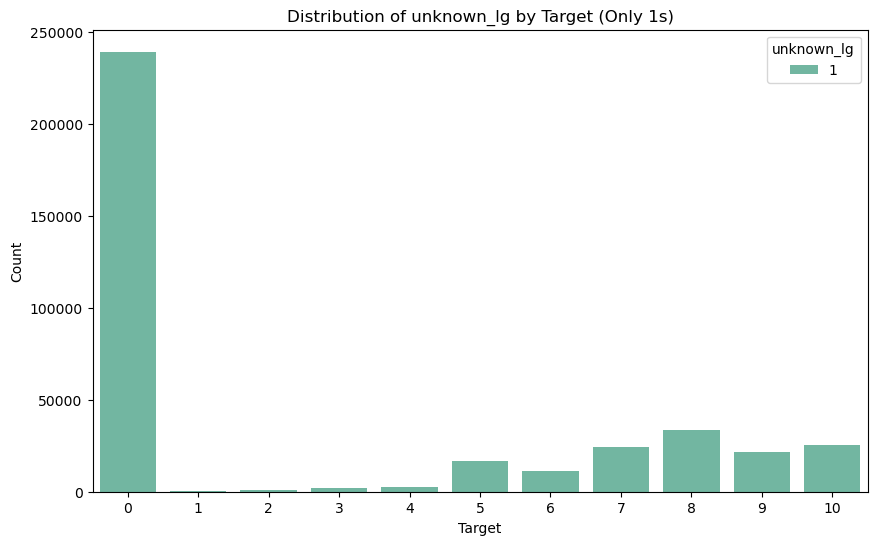

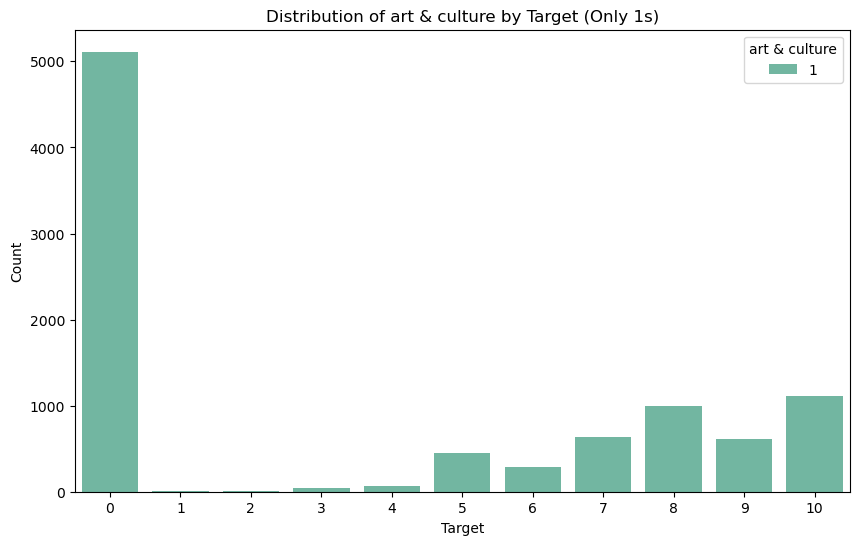

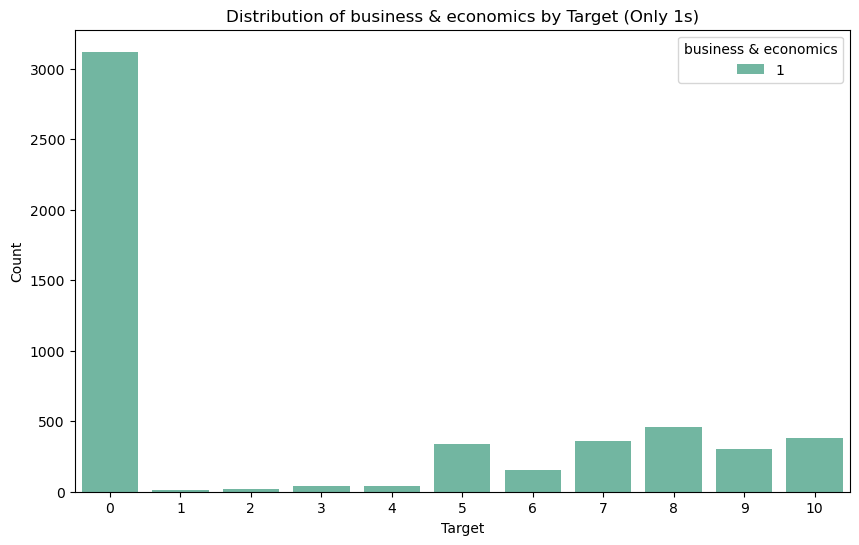

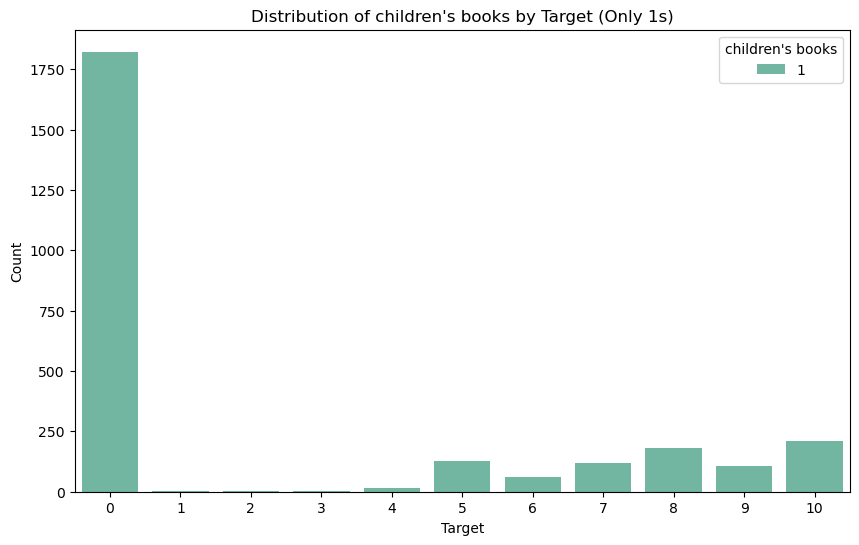

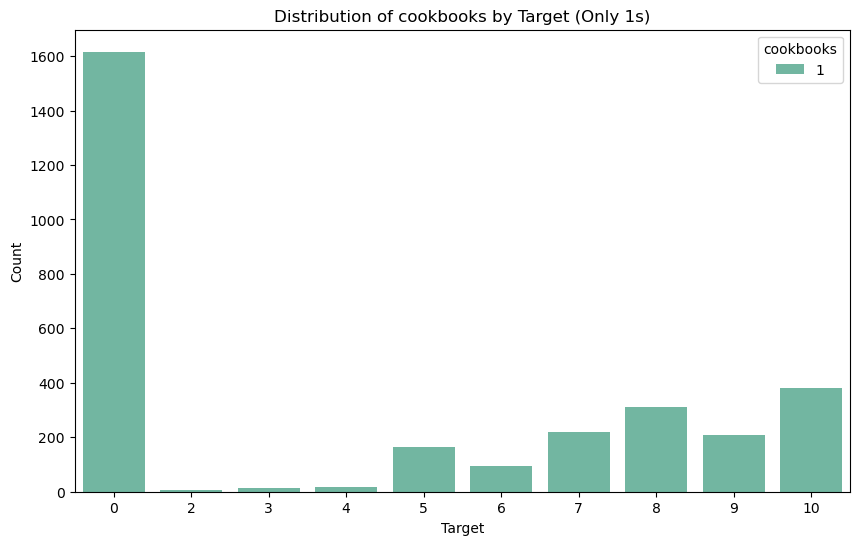

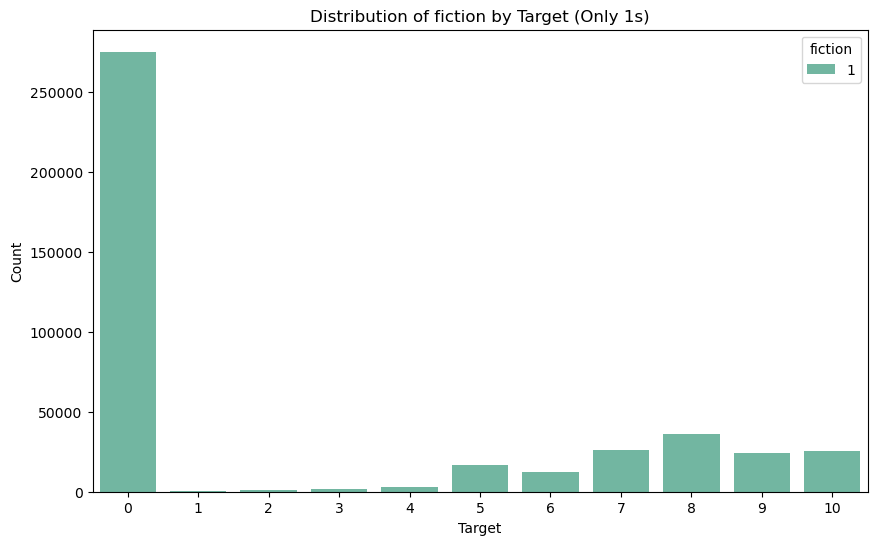

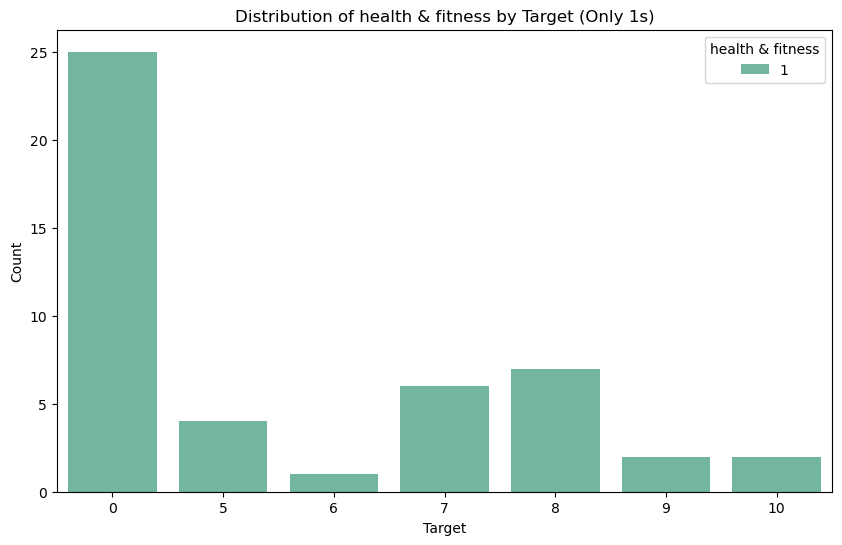

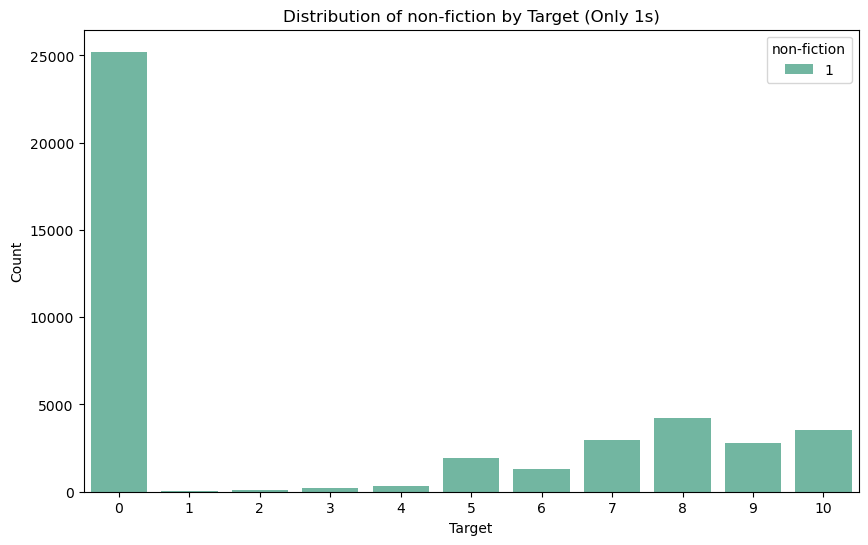

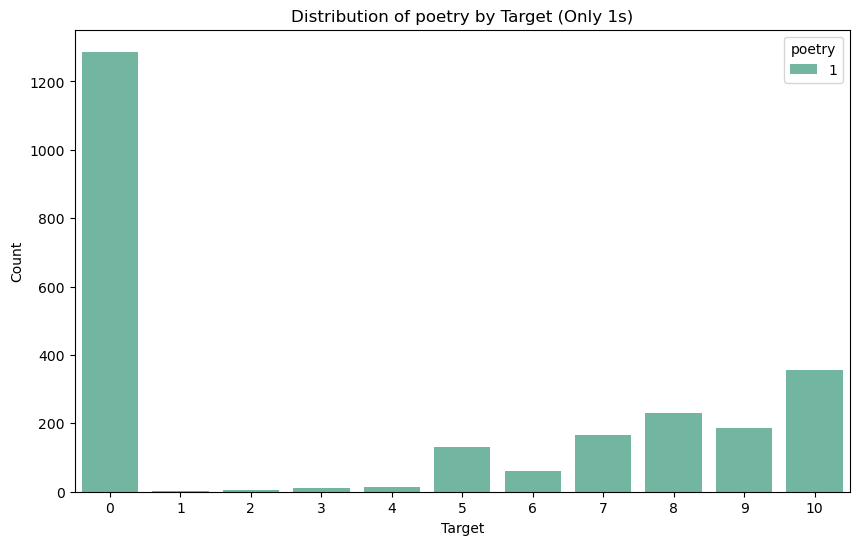

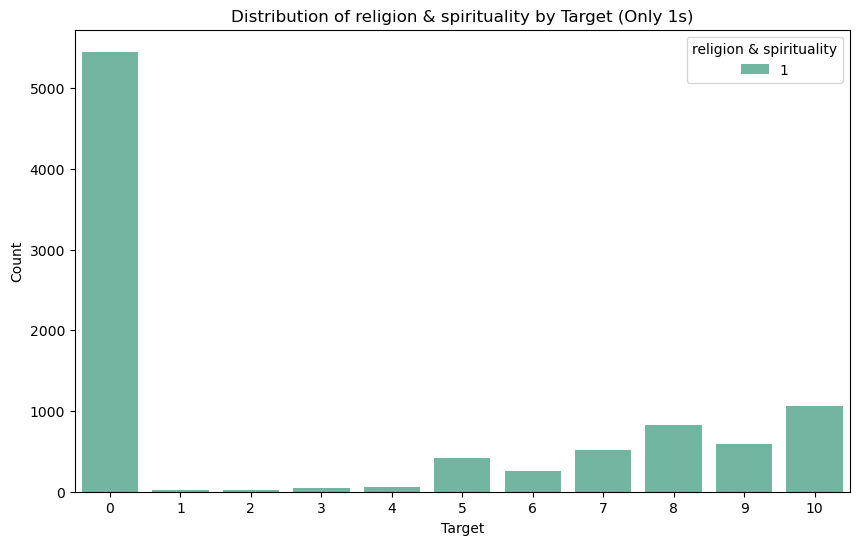

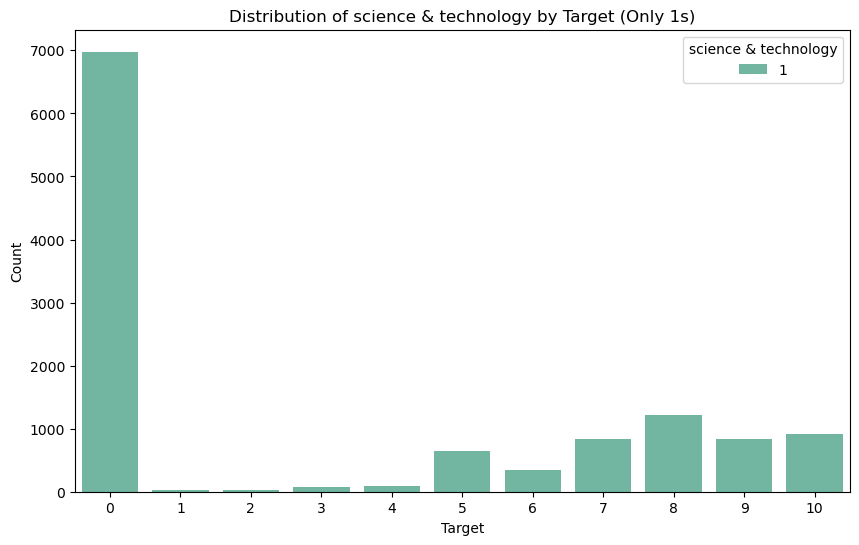

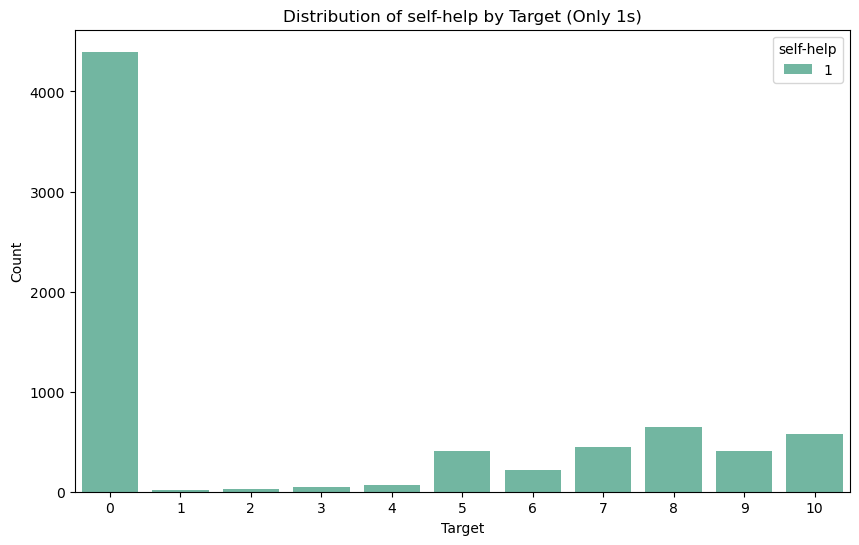

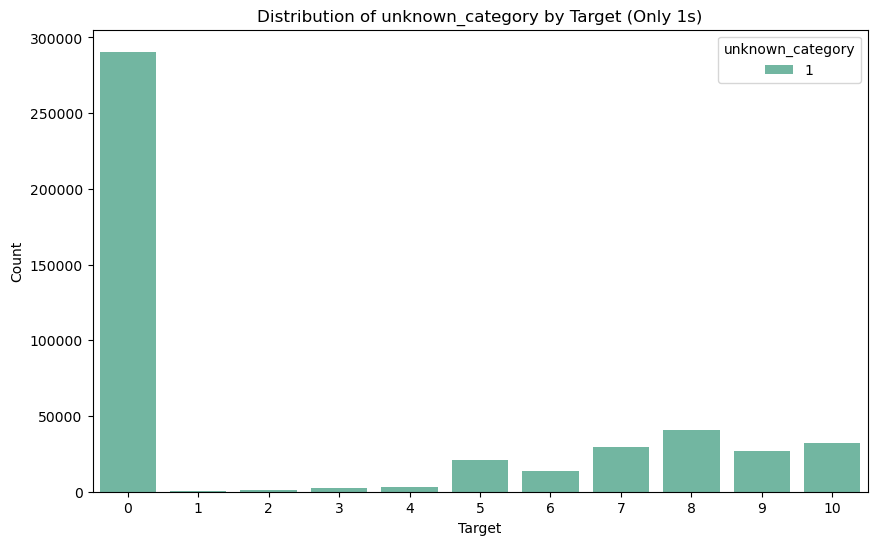

In [15]:
for col in X_categorical.columns:
    plt.figure(figsize=(10, 6))
    
    # Create a dataframe for the categorical column and the target
    data = X_categorical.assign(y=y)
    
    # Filter data where the column value is 1
    filtered_data = data[data[col] == 1]
    
    # Grouped bar plot with target on the x-axis
    grouped_data = filtered_data.groupby(['y', col]).size().reset_index(name='count')
    sns.barplot(data=grouped_data, x='y', y='count', hue=col, palette='Set2')

    # Add plot title and labels
    plt.title(f"Distribution of {col} by Target (Only 1s)")
    plt.xlabel("Target")
    plt.ylabel("Count")
    plt.legend(title=col, loc='upper right')
    plt.show()